***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
## DEBUGGING

In [3]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit.set_initial_coverages(init=[fit.Input.iloc[0,1],fit.Input.iloc[0,1],fit.Input.iloc[0,1],fit.Input.iloc[0,1]]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
fit.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 23.8 ms, sys: 2.03 ms, total: 25.8 ms
Wall time: 25.3 ms


In [4]:
fit.PARAM()

name,value,initial value,min,max,vary
k1,0.05810000,0.0581,0.00000000,inf,True
k2,6.6500e-09,6.65e-09,0.00000000,inf,True
k3,769.000000,769.0,0.00000000,inf,True
k4,115000.000,115000.0,0.00000000,inf,True
k5,260000.000,260000.0,0.00000000,inf,True
k6,0.02140000,0.0214,0.00000000,inf,True
k7,1.35000000,1.35,0.00000000,inf,True
k8,500.000000,500.0,0.00000000,inf,True


# -----------mfit-----------------

In [5]:
%%time  
#Fitting for Model 1: (without CD) #using curve_fit
t0,covg0,fits0 = fit.fitting_rate_param(option='mfit',method_fit= 'least_squares', plot=True) 
kfit0 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using LMFIT package:
--------------------------------------------------
-Using Method: least_squares


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/lmfit/model.py:994: UserWarning: The keyword argument args does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:423: RuntimeWarning: invalid value encountered in subtract
  lower_dist = x - lb


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

# -----------min-----------------

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

Performing fitting using LMFIT package:
--------------------------------------------------
-Using Method: leastsq

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [9.38373884e+00 1.13799192e-10 6.59602437e+06 2.23593011e+04
 1.29057339e+08 6.29048656e+02 6.41240849e+00 9.29100433e+06]


<IPython.core.display.Javascript object>


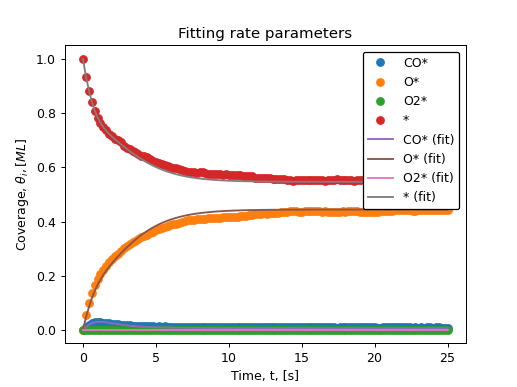

CPU times: user 41min 33s, sys: 6.86 s, total: 41min 40s
Wall time: 41min 37s


In [5]:
%%time # 
#Fitting for Model 1: (without CD) #using LMFIT 
t1,covg1,fits1 = fit.fitting_rate_param(option='min',method_min='leastsq',maxfev = 1e7,plot=True) 
kfit1 = fit.fitted_k

In [7]:
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model

In [8]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])

(0.0, 25.000000000000085)

In [10]:
kfit1 = np.array([9.38373884e+00, 1.13799192e-10, 6.59602437e+06, 2.23593011e+04,
 1.29057339e+08 ,6.29048656e+02, 6.41240849e+00 ,9.29100433e+06])

<IPython.core.display.Javascript object>


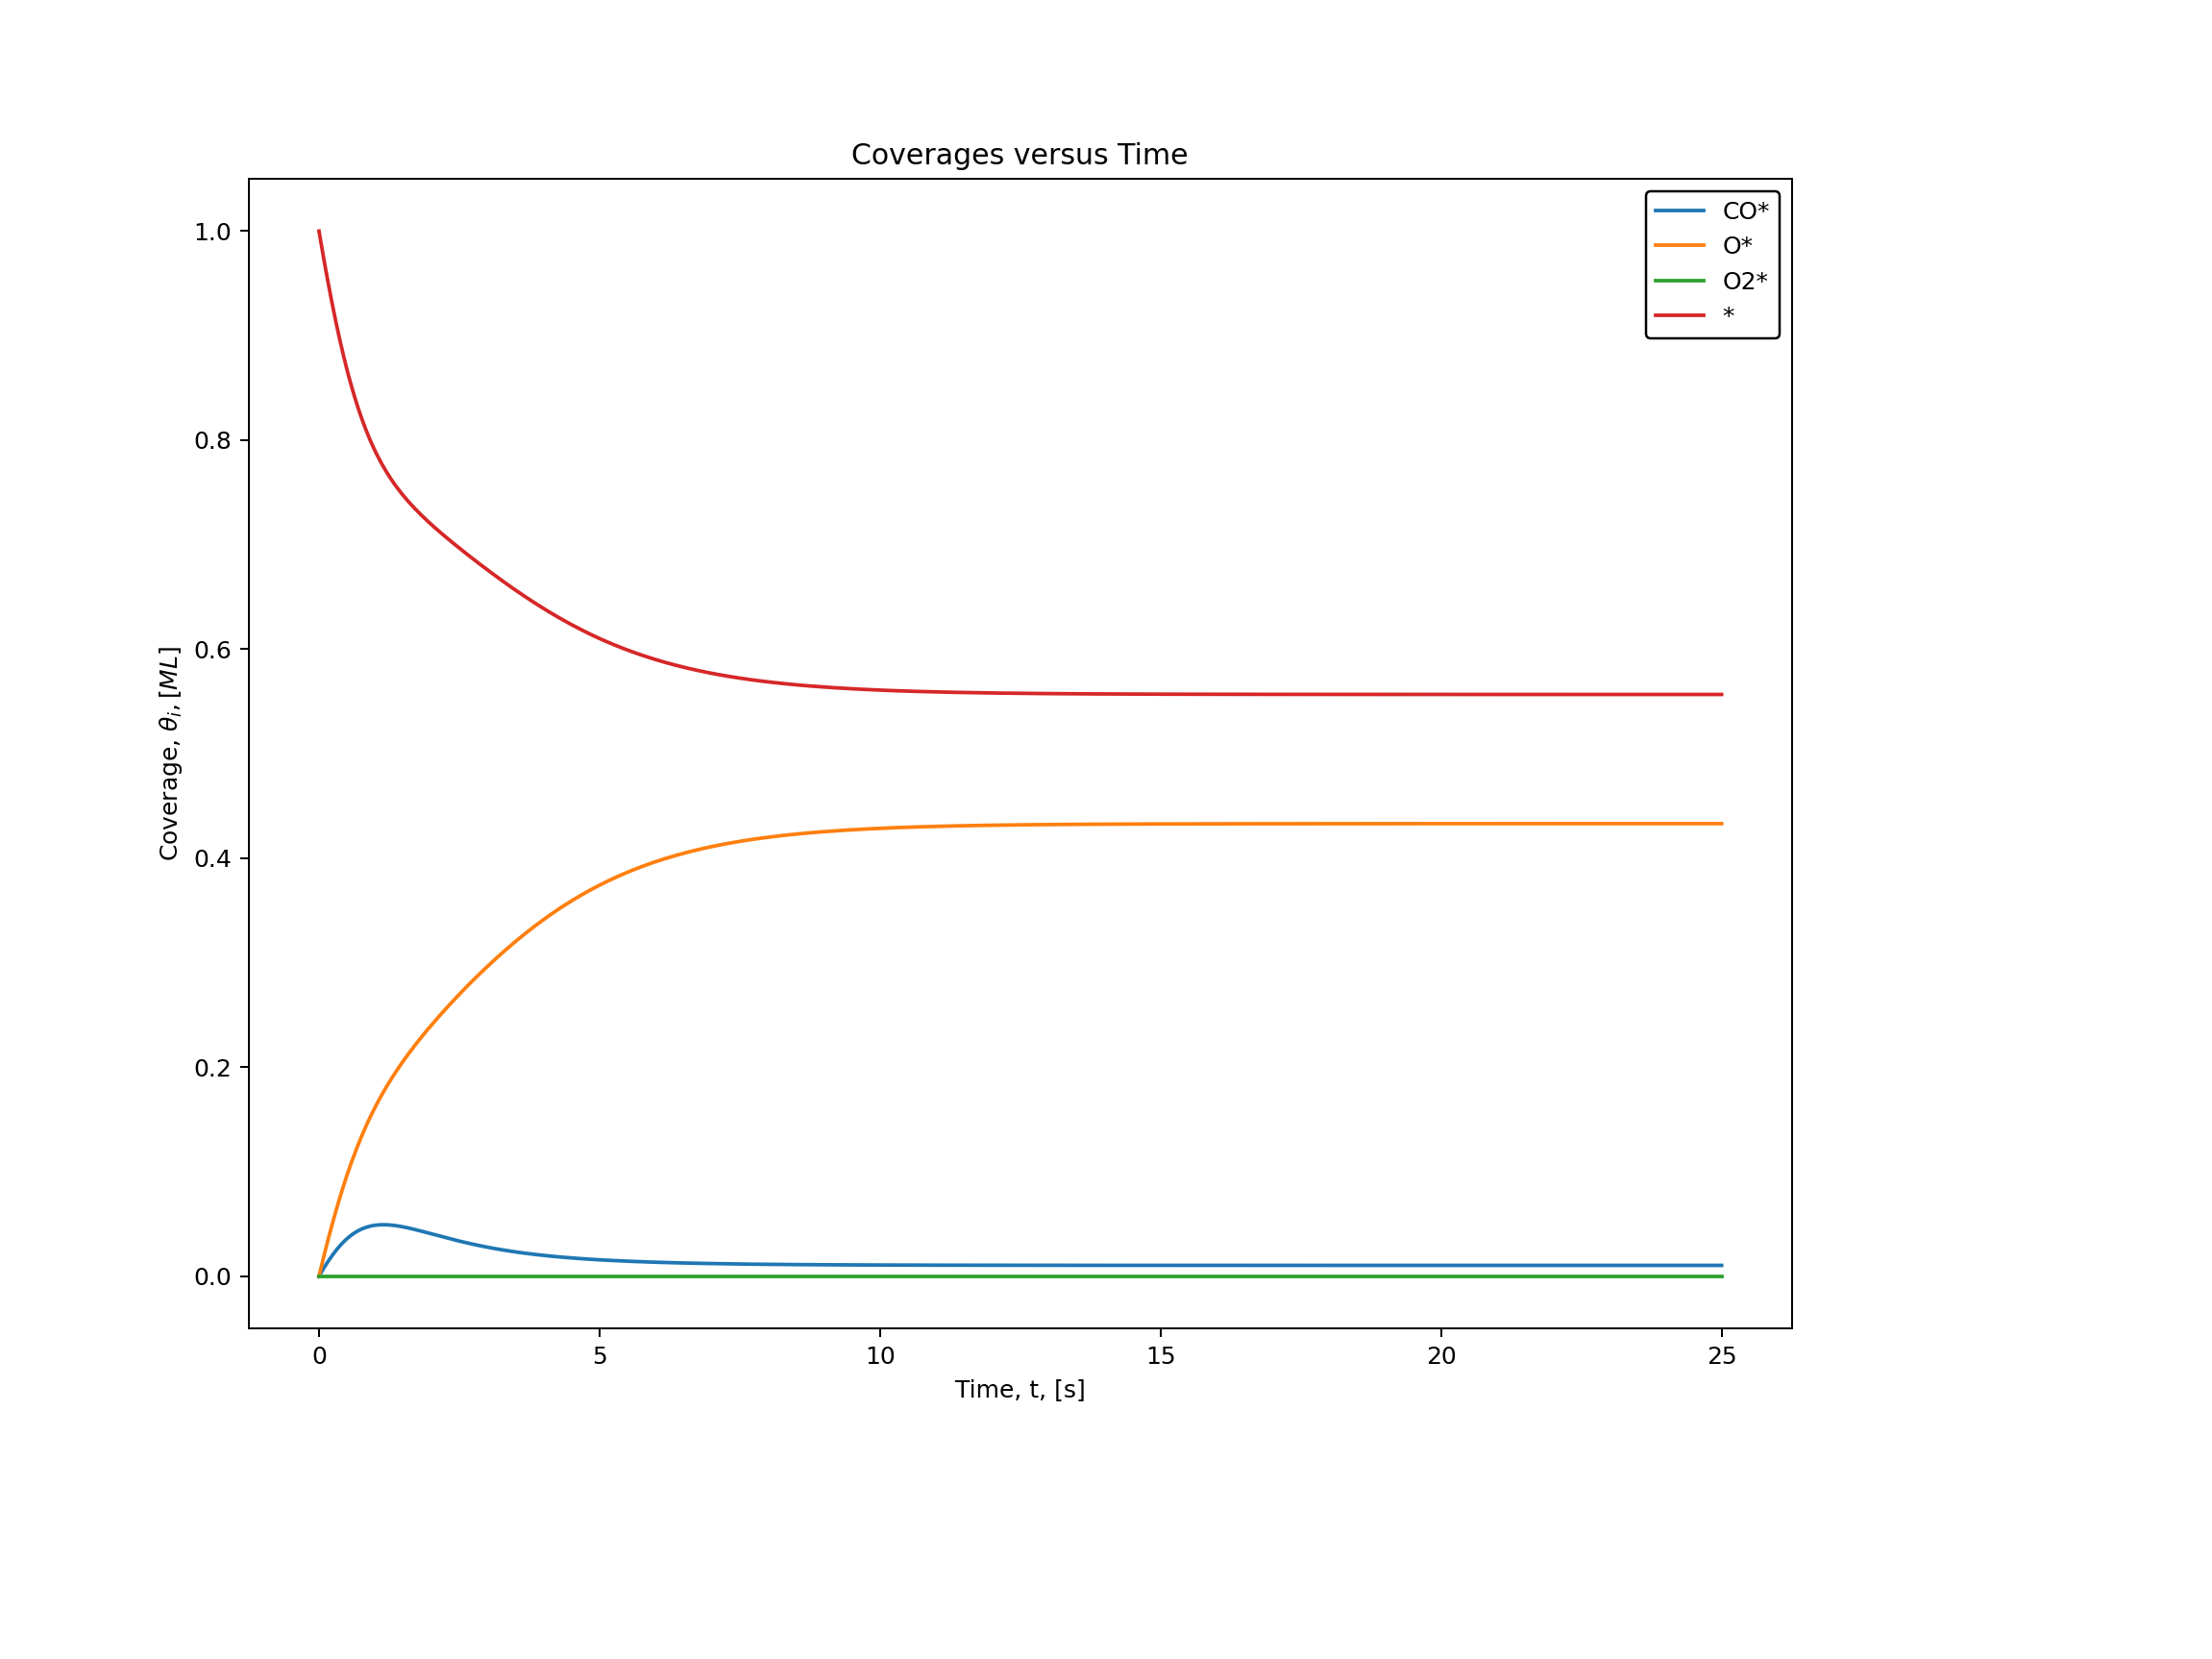

In [11]:
MKM1.k = kfit1
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [15]:
(MKM1.get_SS_rates_production(tf=None))

array([-5.222964411436512e-08, -4.075723357491179e-07,
       1.0395347964028967e-07, -5.172383552592455e-08,
       7.112110748837275e-07, -9.941512890687676e-12,
       -6.594772978449123e-07], dtype=object)

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

Performing fitting using LMFIT package:
--------------------------------------------------
-Using Method: least_squares

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [3.35581945e+05 2.19874351e-01 1.68334782e+06 1.08805355e+02
 9.42910268e+05 1.60395025e+02 9.48668257e-32 1.23303528e+06]


<IPython.core.display.Javascript object>


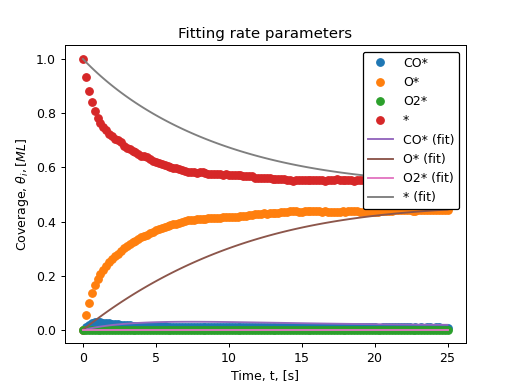

CPU times: user 6min 20s, sys: 37.3 s, total: 6min 57s
Wall time: 5min 6s


In [6]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t2,covg2,fits2 = fit.fitting_rate_param(option='min',method_min='least_squares',maxfev = 1e10,plot=True) 
kfit2 = fit.fitted_k

<IPython.core.display.Javascript object>


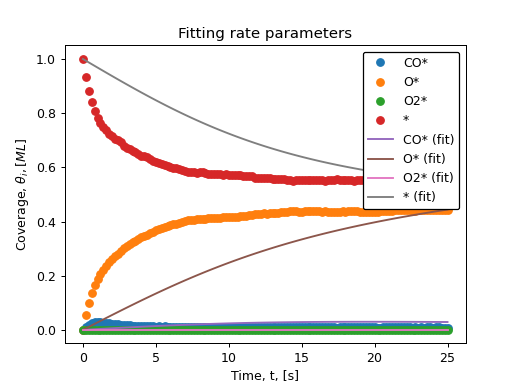

In [9]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t5,covg5,fits5 = fit.fitting_rate_param(option='min',method_min='lbfgsb',maxfev = 1e7,plot=True) 
kfit5 = fit.fitted_k

# -----------CMIN-----------------

<IPython.core.display.Javascript object>


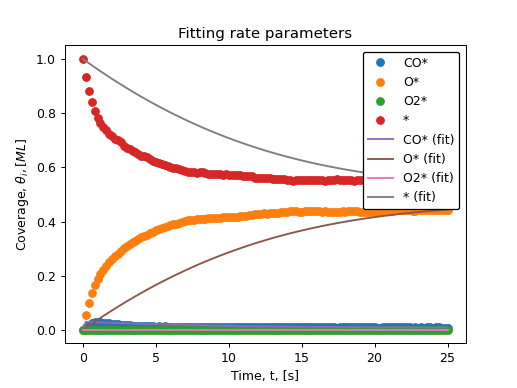

In [12]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t1b,covg1b,fits1b = fit.fitting_rate_param(option='cmin',method_min='leastsq',maxfev = 1e10,plot=True) 
kfit1b = fit.fitted_k

<IPython.core.display.Javascript object>


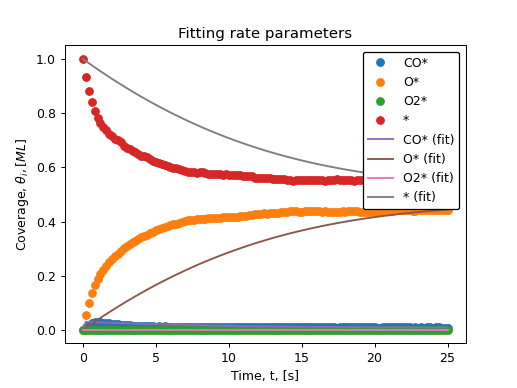

In [13]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t2b,covg2b,fits2b = fit.fitting_rate_param(option='cmin',method_min='least_squares',maxfev = 1e10,plot=True) 
kfit2b = fit.fitted_k

<IPython.core.display.Javascript object>


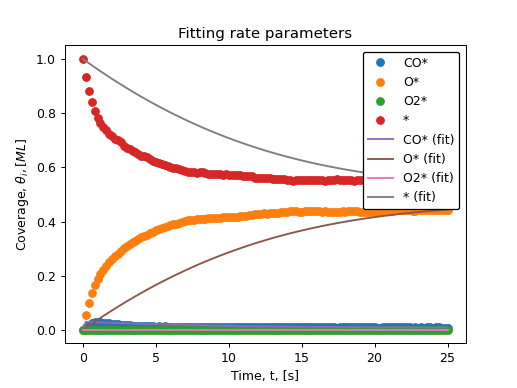

In [19]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t5b,covg5b,fits5b = fit.fitting_rate_param(option='cmin',method_min='lbfgsb',maxfev = 1e7,plot=True) 
kfit5b = fit.fitted_k

### Testing Cov_func

In [8]:
val = tuple(kfit1) #Tuple rate parameters to be used for covg_func function

In [9]:
s = fit.covg_func(3,*val) #USING THE COVG_FUNC THAT GENERATES NORMALIZED MKMODEL DERIVED COVERAGES WHICH ARE USED TO CALUCLATE ERRORS
s = s.reshape(np.shape(covg1[:,0:])) #RESHAPING THE OUTPUTTED LONG VECTOR TO MATCH EXPECTED MATRIX 

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)



<IPython.core.display.Javascript object>


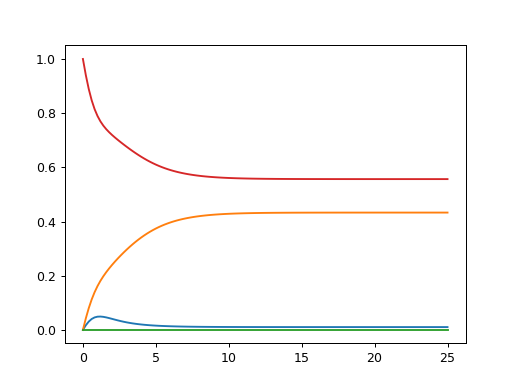

In [10]:
plt.figure()
plt.plot(t1,s[:,0],t1,s[:,1],t1,s[:,2],t1,s[:,3])

### Testing out normalizing results from solve_coverage

In [11]:
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model

Mass is conserved. 



In [12]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])

(0.0, 25.000000000000085)

<IPython.core.display.Javascript object>


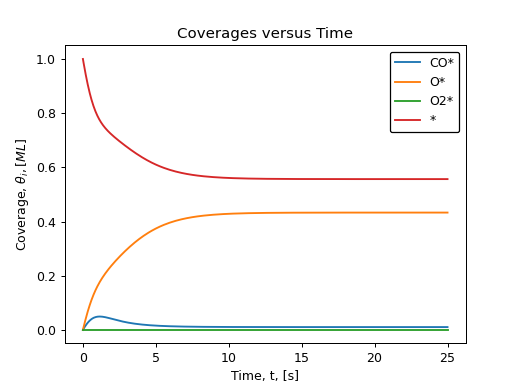

In [13]:
MKM1.k = kfit1
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [12]:
MKM1.create_csv(k_inp=kfit1,Name='Fitted_ks_from_NON_norm_data.csv',label='rate_coeff')

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Using CURVE FIT AND MINIMIZER W/ fitted params

In [3]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fitb = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fitb.set_initial_coverages(init=[fitb.Input.iloc[0,1],fitb.Input.iloc[0,1],fitb.Input.iloc[0,1],fitb.Input.iloc[0,1]]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
fitb.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
fitb.set_limits_of_integration(fitb.Input.iloc[0,0],fitb.Input.iloc[-1,0])
fitb.n_extract = 0.5

Mass is conserved. 

CPU times: user 47.7 ms, sys: 6.6 ms, total: 54.3 ms
Wall time: 54.6 ms


Fitting using fitted constants from KMC/Param file
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_lsq/least_squares.py:110: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  warn("Setting `{}` below the machine epsilon ({:.2e}) effectively "



 Initial guess: 

-> Rate Constants:
 [8.67173990e+06 2.83607439e+05 2.19775600e+06 6.08895049e+00
 5.08887043e+06 1.87761895e+04 2.47715647e+06 4.76179797e+07]

 Final predictions: 

-> Rate Constants:
 [2.18817359e+07 2.83673853e+05 8.12243110e+06 6.08895049e+00
 7.44316954e+06 2.74752082e+04 2.47715647e+06 3.57663433e+07]


<IPython.core.display.Javascript object>


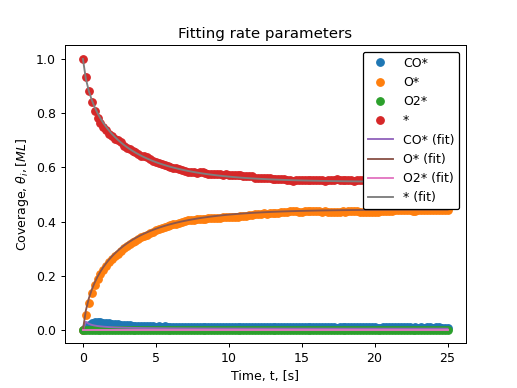

In [4]:
print('Fitting using fitted constants from KMC/Param file')
fitb.k = np.array([8.67173990e+06, 2.83607439e+05, 2.19775600e+06, 6.08895049e+00, 5.08887043e+06, 1.87761895e+04, 2.47715647e+06 ,4.76179797e+07])
t_b,covg_b,fits_b = fitb.fitting_rate_param(option='cf',gtol=1e-18,ftol=1e-18,tol=1e-18,maxiter=1e7,maxfun=1e7,plot=True) #min stands for minimize

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: L-BFGS-B


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3_NO_NORMALIZATION/main.py:1027: OptimizeWarning: Unknown solver options: xatol, fatol, adaptive
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [8.67173990e+06 2.83607439e+05 2.19775600e+06 6.08895049e+00
 5.08887043e+06 1.87761895e+04 2.47715647e+06 4.76179797e+07]

 Final predictions: 

-> Rate Constants:
 [8.67182564e+06 2.85900064e+05 2.19764152e+06 2.03091894e+00
 5.08872812e+06 5.71324827e+04 2.47690805e+06 4.76180433e+07]


<IPython.core.display.Javascript object>


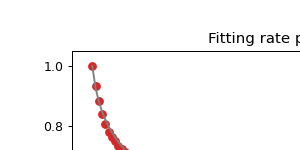

In [5]:
t_b2,covg_b2,fits_b2 = fitb.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-18,ftol=1e-18,tol=1e-18,maxiter=1e7,maxfun=1e7,plot=True) #min stands for minimize

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Perfroming Fitting of rate parameters

In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 41.3 ms, sys: 6.06 ms, total: 47.4 ms
Wall time: 48.8 ms


50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Input dataset has been normalized for fitting
Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [5.78727805e+03 6.95562234e-02 1.79914758e+04 1.15536198e+05
 2.18920690e+05 4.11143536e+02 7.77106584e+03 1.67044412e+04]


<IPython.core.display.Javascript object>


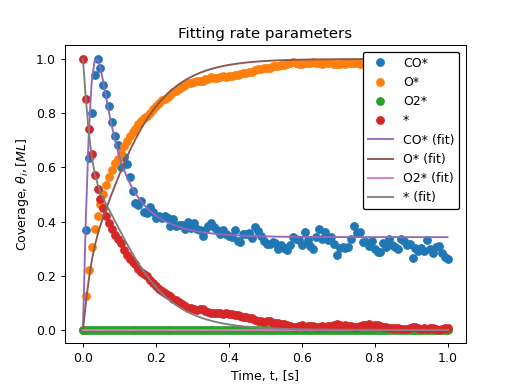

CPU times: user 2min 28s, sys: 12.3 s, total: 2min 41s
Wall time: 2min 6s


In [3]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit.k  #Resetting the rate constants used in MK model for fitting
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',plot=True) #cf stands for curve fit
kfit1 = fit.fitted_k

In [7]:
print(kfit1)

[5.81039593e-02 2.44993342e-02 1.45363984e+03 1.15002358e+05
 2.60000000e+05 1.62886352e+03 1.16760217e+02 7.10636114e+02]


In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b_b = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit1_b_b.k = kfit1
t1_b_b,covg1_b_b,fits1_b_b = fit1_b_b.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-12,ftol=1e-8,tol=1e-8,maxiter=1e4,maxfun=1e4,plot_norm=True) #min stands for minimize

In [5]:
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

Mass is conserved. 



In [13]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])

(0.0, 25.000000000000085)

In [14]:
MKM1.k = kfit1

In [7]:
print((kfit1))

[1.51975063e+00 1.62511305e-01 7.69000054e+02 1.15000000e+05
 2.60000000e+05 5.25762342e+02 1.82755385e+02 5.00829032e+02]


<IPython.core.display.Javascript object>


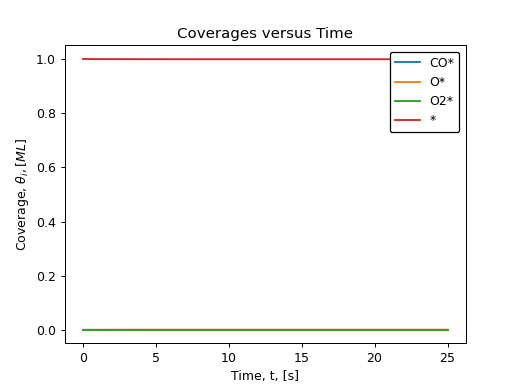

In [15]:
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [16]:
print(MKM1.k)

[5.78727805e+03 6.95562234e-02 1.79914758e+04 1.15536198e+05
 2.18920690e+05 4.11143536e+02 7.77106584e+03 1.67044412e+04]


In [17]:
print(MKM1.kextract())
MKM1.k = MKM1.kextract()

[2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02]


<IPython.core.display.Javascript object>


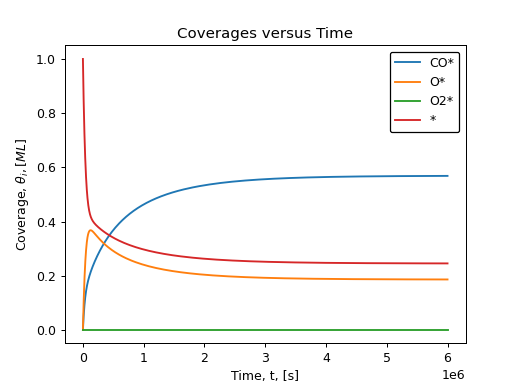

In [12]:
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

### WITH CD (CF)

In [4]:
%%time 
#Fitting for Model 1: (with CD) #using curve_fit
fit1 = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit1.set_limits_of_integration(fit1.Input.iloc[0,0],fit1.Input.iloc[-1,0])
fit1.rate_const_correction = 'Forced_exp_CD'
fit1.n_extract = 0.5

Mass is conserved. 

CPU times: user 20.7 ms, sys: 2.81 ms, total: 23.5 ms
Wall time: 21.8 ms


50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Input dataset has been normalized for fitting
Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [1.77169298e+03 1.00737422e-01 1.13601201e+04 1.14848009e+05
 2.60000000e+05 5.84491152e+02 4.73833467e+03 8.56831124e+03]


<IPython.core.display.Javascript object>


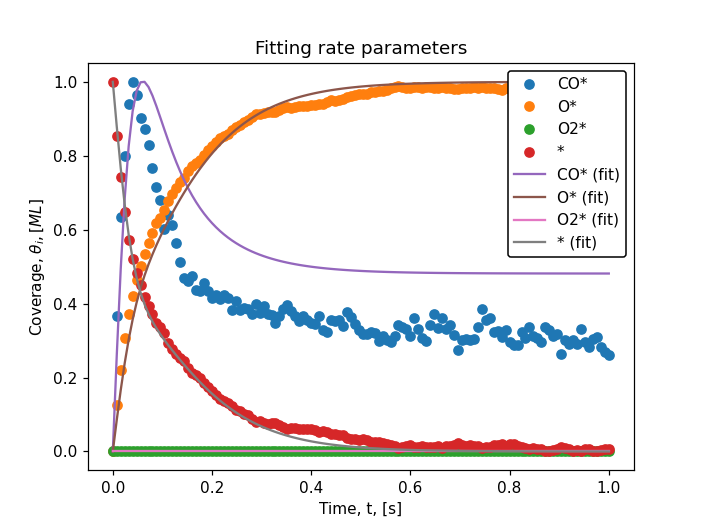

CPU times: user 2min 23s, sys: 12 s, total: 2min 35s
Wall time: 1min 43s


In [5]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit1.k  #Resetting the rate constants used in MK model for fitting
t2,covg2,fits2 = fit1.fitting_rate_param(option='cf',maxfev=1e5,xtol=1e-12,ftol=1e-12,plot=True) #cf stands for curve fit
kfit2 = fit1.fitted_k

In [6]:
print(fit1.MKM.rate_const_correction)

Forced_exp_CD


## MINIMIZER

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Input dataset has been normalized for fitting
--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: L-BFGS-B


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3/main.py:1005: OptimizeWarning: Unknown solver options: xatol, fatol, adaptive
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [5.78727805e+03 6.95562234e-02 1.79914758e+04 1.15536198e+05
 2.18920690e+05 4.11143536e+02 7.77106584e+03 1.67044412e+04]

 Final predictions: 

-> Rate Constants:
 [  5787.22114246      0.          17991.60480537 115536.21171056
 218920.68292929    420.1132555    7770.93681676  16704.48303272]


<IPython.core.display.Javascript object>


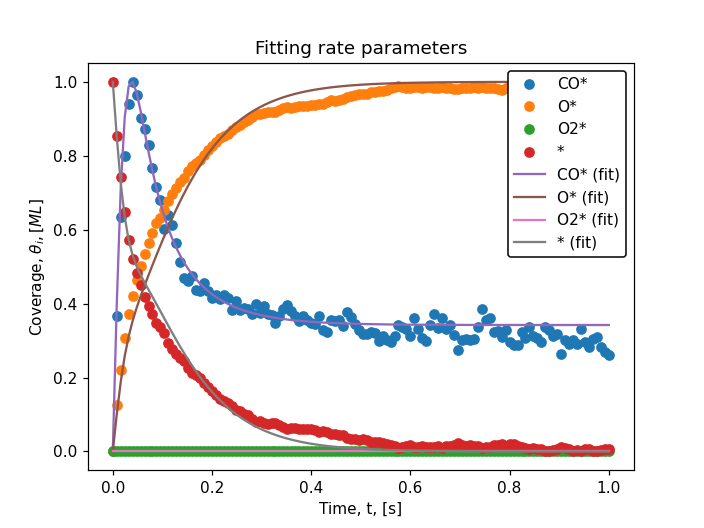

CPU times: user 8min 49s, sys: 2.25 s, total: 8min 51s
Wall time: 8min 50s


In [7]:
%%time
fit.k = kfit1 #Resetting the rate constants used in MK model for fitting to those fitted in curve fit
t2,covg2,fits2 = fit.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-5,ftol=1e-5,maxfun=1e5,maxiter=1e5,plot=True) #cf stands for curve fit

### WITH CD (Min)

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Input dataset has been normalized for fitting
--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: L-BFGS-B


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3/main.py:1005: OptimizeWarning: Unknown solver options: xatol, fatol, adaptive
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [5.78727805e+03 6.95562234e-02 1.79914758e+04 1.15536198e+05
 2.18920690e+05 4.11143536e+02 7.77106584e+03 1.67044412e+04]

 Final predictions: 

-> Rate Constants:
 [  3288.26074971      0.          19374.86709512 115461.5409376
 218960.07622149    451.22485083   9406.92133035  16840.88694039]


<IPython.core.display.Javascript object>


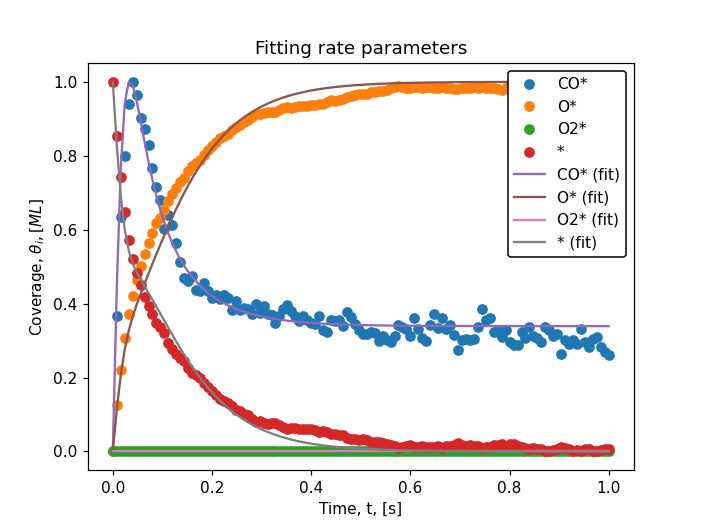

CPU times: user 39min 23s, sys: 8.61 s, total: 39min 31s
Wall time: 39min 26s


In [8]:
%%time
fit1.k = kfit1 #Resetting the rate constants used in MK model for fitting to those fitted in curve fit
t21,covg21,fits21 = fit1.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-8,ftol=1e-8,maxfun=1e5,maxiter=1e5,plot=True) #cf stands for curve fit